<a href="https://colab.research.google.com/github/tomas-pinheiro/tomas-pinheiro/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Case prático Startups "Unicórnios"**



https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups?resource=download

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
base_dados = pd.read_csv('unicorns till sep 2022.csv')

In [5]:
base_dados.shape

(1186, 7)

In [28]:
# Primeiros 10 registros
base_dados.head(n=10)

,Empresa,Valor($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
5,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",5,2019
6,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",12,2014
7,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2,2019
8,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",4,2018
9,Epic Games,31.5,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",10,2018


In [7]:
base_dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [8]:
base_dados.rename(columns={
    'Unamed : 0' : 'Id',
    'Company' : 'Empresa', 
    'Valuation ($B)' : 'Valor($)', 
    'Date Joined' : 'Data de Adesão', 
    'Country' : 'Pais', 
    'City' : 'Cidade', 
    'Industry' : 'Setor', 
    'Investors' : 'Investidores',
}, inplace=True)

In [9]:
# Verificar tipo da informação

In [10]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor($)        1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


Repare que a *texto em itálico*

In [11]:
# Campos nulos
base_dados.isnull().sum()

Empresa            0
Valor($)           0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investidores      18
dtype: int64

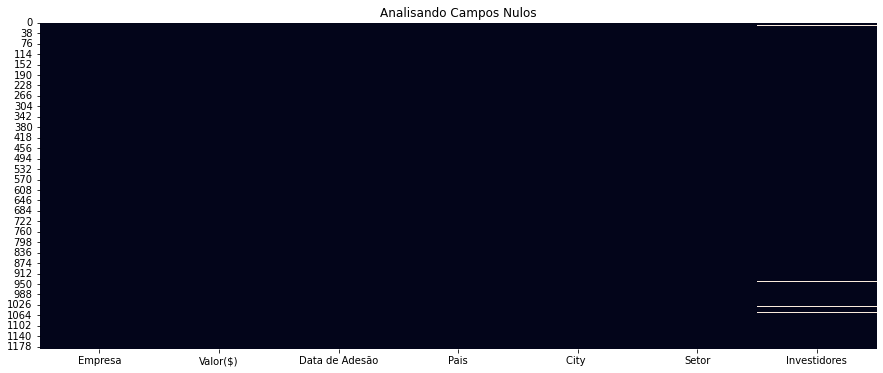

In [12]:
# Gráfico
plt.figure( figsize=(15,6)) # Ajusta tamanho da figura
plt.title('Analisando Campos Nulos') # Altera título
sns.heatmap(base_dados.isnull(), cbar =False); # Printa heatmap expondo quais colunas tiveram nulos


In [13]:
# Campos únicos
base_dados.nunique()

Empresa           1183
Valor($)           222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [14]:
# Valores únicos
base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [15]:
# Valores únicos - Rank
base_dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [16]:
# Valores únicos - Rank
## Neste caso, será para obter a %
base_dados['Setor'].value_counts(normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

In [17]:
counts = base_dados['Setor'].value_counts()

In [18]:
counts_17 = counts.head(17)

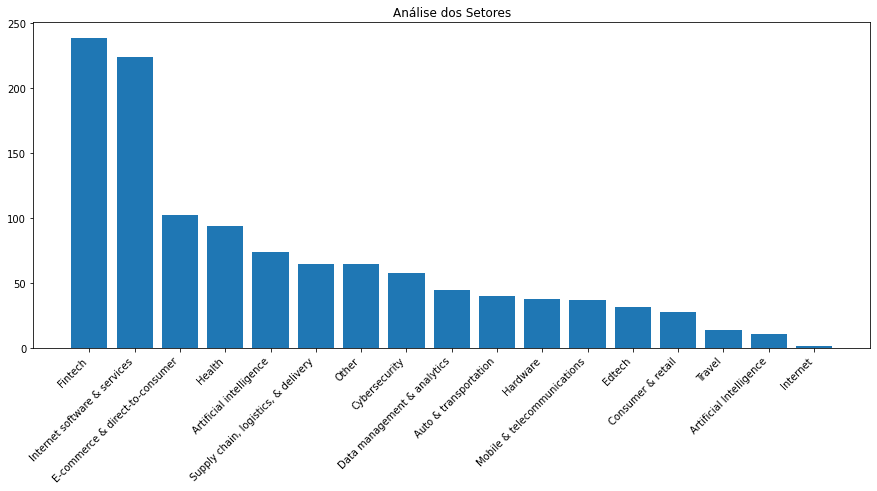

In [19]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(counts_17.index, counts_17)
plt.xticks(rotation=45, ha='right');

In [20]:
Analise = round(base_dados['Pais'].value_counts(normalize=True)*100)

In [21]:
Analise_nao_nulos = Analise[Analise != 0.0] #Remoção dos valores em branco
Analise_nao_nulos

United States     54.0
China             15.0
India              6.0
United Kingdom     4.0
Germany            2.0
France             2.0
Israel             2.0
Canada             2.0
Brazil             1.0
South Korea        1.0
Singapore          1.0
Sweden             1.0
Mexico             1.0
Australia          1.0
Indonesia          1.0
Netherlands        1.0
Hong Kong          1.0
Ireland            1.0
Japan              1.0
Switzerland        1.0
Name: Pais, dtype: float64

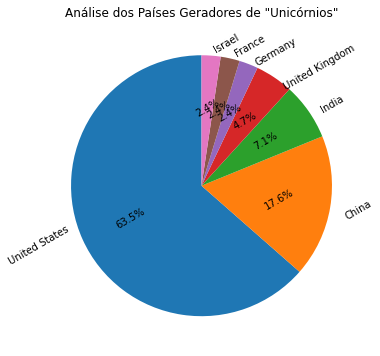

In [22]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Países Geradores de "Unicórnios"')
plt.pie(
    Analise_nao_nulos[:7],
    labels=Analise_nao_nulos.index[:7],
    startangle=90,
    autopct='%1.1f%%',
    textprops={'rotation': 30}
);

In [23]:
# Conversão para Data
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])

base_dados ['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [24]:
#Extrair o Ano e Mes
base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year

base_dados.head()

,Empresa,Valor($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [25]:
analise_agrupada = base_dados.groupby(by=['Pais', 'Ano', 'Mes']).count()['Investidores'].reset_index
analise_agrupada

<bound method Series.reset_index of Pais           Ano   Mes
Argentina      2021  8       1
Australia      2018  1       1
               2019  3       1
               2021  5       1
                     7       2
                            ..
United States  2022  6      14
                     7       4
                     8       3
Vietnam        2021  10      1
                     12      1
Name: Investidores, Length: 441, dtype: int64>

In [26]:
# Transfformando a coluna valor
base_dados['Valor($)'] = pd.to_numeric(base_dados['Valor($)'].apply(lambda Linha: Linha.replace('$', '')))

base_dados

,Empresa,Valor($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
...,...,...,...,...,...,...,...,...,...
1181,LeadSquared,1.0,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",6,2022
1182,FourKites,1.0,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",6,2022
1183,VulcanForms,1.0,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",7,2022
1184,SingleStore,1.0,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",7,2022


In [41]:
# Tabela Analítica 
analise_pais = base_dados.groupby(by=['Pais']).sum()['Valor($)'].reset_index()


In [43]:
analise_valor = analise_pais.sort_values('Valor($)', ascending=False)
analise_valor.head()

,Pais,Valor($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


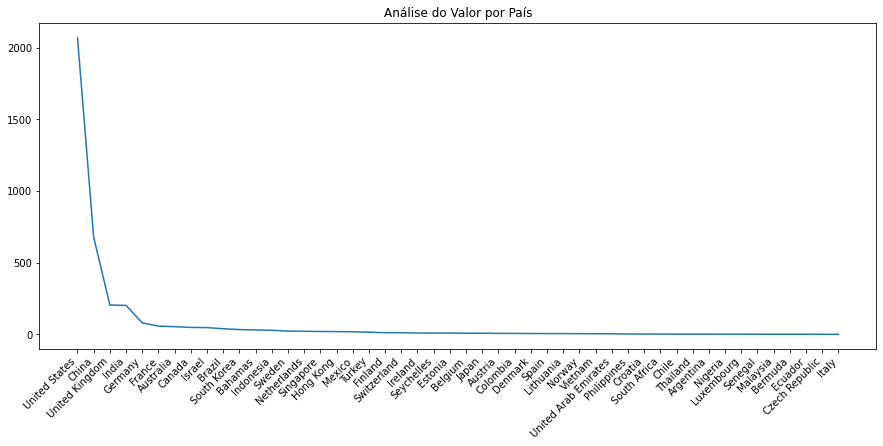

In [48]:
plt.figure(figsize=(15,6))
plt.title('Análise do Valor por País')
plt.xticks(rotation=45, ha='right')
plt.plot(analise_valor['Pais'], analise_valor['Valor($)']);
